In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# MONK 1

In [4]:
columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'id']

train_df = pd.read_csv("MONK/monks-1.train", header=None, names=columns, sep=' ').set_index('id')
test_df = pd.read_csv("MONK/monks-1.test", header=None, names=columns, sep=' ').set_index('id')

merged_df = pd.concat([train_df, test_df])

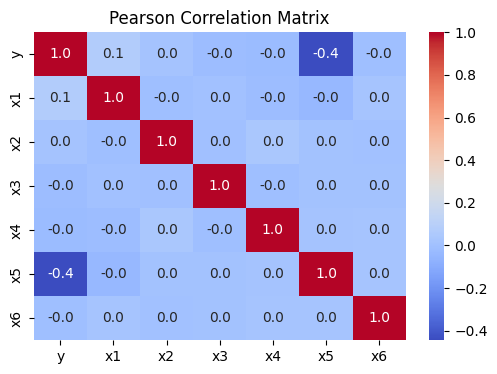

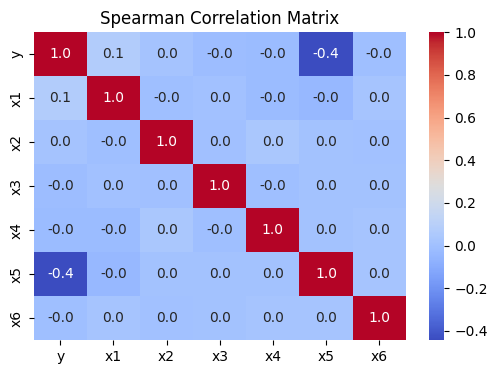

In [8]:
pearson_corr = merged_df.corr(method='pearson')
spearman_corr = merged_df.corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Spearman Correlation Matrix')
plt.show()

### From the correlation analysis on MONK1 dataset we notice that the only two features that determine the value of the dependent variable y are x1 and x5. From this it is also possible to train a model based on these two variables.

# MONK 2

In [9]:
columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'id']

train_df = pd.read_csv("MONK/monks-2.train", header=None, names=columns, sep=' ').set_index('id')
test_df = pd.read_csv("MONK/monks-2.test", header=None, names=columns, sep=' ').set_index('id')

merged_df = pd.concat([train_df, test_df])

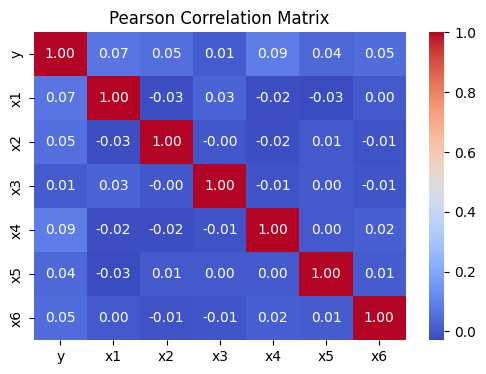

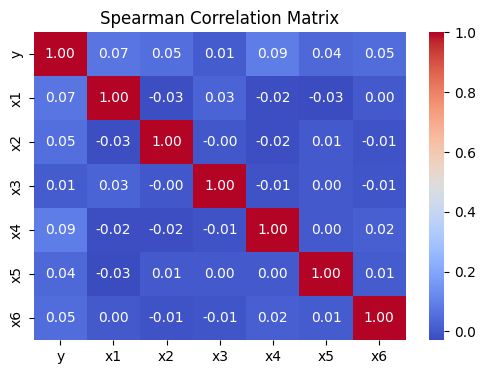

In [11]:
pearson_corr = merged_df.corr(method='pearson')
spearman_corr = merged_df.corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

### Here we highlight the fact that every features influence the result of the value prediction of y.

# MONK 3

In [14]:
columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'id']

train_df = pd.read_csv("MONK/monks-3.train", header=None, names=columns, sep=' ').set_index('id')
test_df = pd.read_csv("MONK/monks-3.test", header=None, names=columns, sep=' ').set_index('id')

merged_df = pd.concat([train_df, test_df])

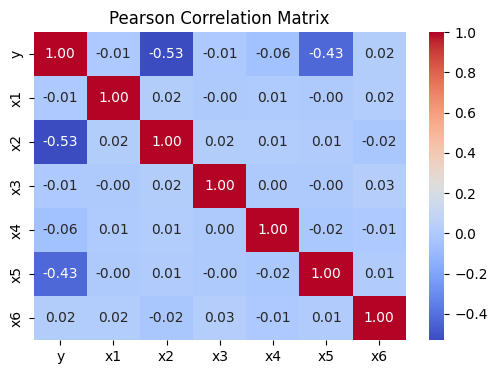

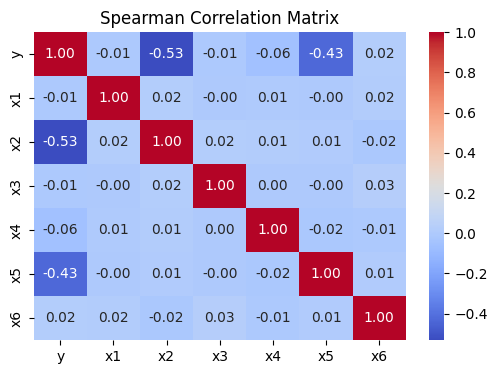

In [15]:
pearson_corr = merged_df.corr(method='pearson')
spearman_corr = merged_df.corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

#### An important observation can be made on the correlation matrix performed on MONK3. We notice that the two most important features are x2 and x5, while the others seem to have very little influence on the outcome of y. From this we can assume that the dataset contains outliers or misclassified records.

#### It was therefore decided to explore this phenomenon in more depth. A correlation analysis was performed separately on the training set and the test set, to observe to what extent outliers are present in one and the other dataset.

In [12]:
train_df = pd.read_csv("MONK/monks-3.train", header=None, names=columns, sep=' ').set_index('id')
test_df = pd.read_csv("MONK/monks-3.test", header=None, names=columns, sep=' ').set_index('id')

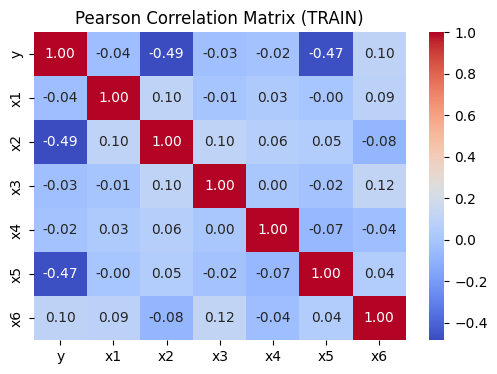

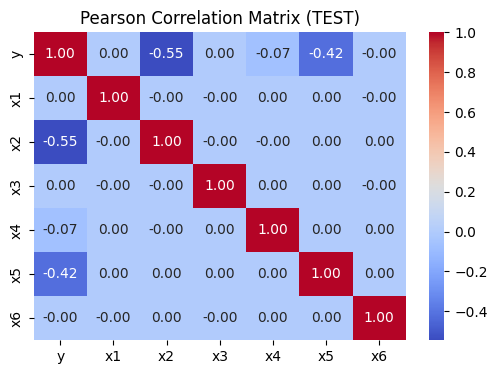

In [13]:
pearson_corr_train = train_df.corr(method='pearson')
pearson_corr_test = test_df.corr(method='pearson')

plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix (TRAIN)')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr_test, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix (TEST)')
plt.show()

#### Here we notice a strong discrepancy between training and test set in terms of correlation: while in the training set each variable seems to contribute to the outcome of y, in the test set only 3 variables influence y. This explains the greater accuracy that certain models achieve on the test set compared to the training set.

#### It was therefore decided to perform outlier detection on the training set and find those records that seem to introduce noise into the TR set. We used two models to do so and compre the results: Isolation Forest and Local Outlier Factor

In [44]:
iso_forest = IsolationForest(contamination=0.1)
train_df['outlier_iso'] = iso_forest.fit_predict(train_df)

lof = LocalOutlierFactor(n_neighbors=30, contamination=0.1)
train_df['outlier_lof'] = lof.fit_predict(train_df)

outliers_iso = train_df[train_df['outlier_iso'] == -1]
outliers_lof = train_df[train_df['outlier_lof'] == -1]

num_rows = train_df.shape[0]
print(f'Numero di dati nel train set: {num_rows}')

print(f'Number of outliers detected by Isolation Forest: {len(outliers_iso)}')
print(f'Number of outliers detected by LOF: {len(outliers_lof)}')

Numero di dati nel train set: 103
Number of outliers detected by Isolation Forest: 11
Number of outliers detected by LOF: 11


C:\Users\linov\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [45]:
potential_misclassifications = outliers_iso[['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
print("Potential Misclassifications (IsolationForest):")
print(potential_misclassifications)

potential_misclassifications = outliers_lof[['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
print("\nPotential Misclassifications (LOF):")
print(potential_misclassifications)

Potential Misclassifications (IsolationForest):
          y  x1  x2  x3  x4  x5  x6
id                                 
data_45   1   1   1   2   3   3   1
data_121  0   1   3   2   1   1   1
data_122  0   1   3   2   1   1   2
data_186  1   2   1   2   3   1   2
data_289  1   3   1   1   1   1   1
data_291  1   3   1   1   1   2   1
data_354  1   3   2   1   3   1   2
data_400  0   3   3   1   2   4   2
data_401  0   3   3   1   3   1   1
data_407  0   3   3   1   3   4   1
data_432  0   3   3   2   3   4   2

Potential Misclassifications (LOF):
          y  x1  x2  x3  x4  x5  x6
id                                 
data_45   1   1   1   2   3   3   1
data_121  0   1   3   2   1   1   1
data_122  0   1   3   2   1   1   2
data_186  1   2   1   2   3   1   2
data_289  1   3   1   1   1   1   1
data_291  1   3   1   1   1   2   1
data_354  1   3   2   1   3   1   2
data_400  0   3   3   1   2   4   2
data_401  0   3   3   1   3   1   1
data_407  0   3   3   1   3   4   1
data_432  0   3

In [46]:
common_outliers = train_df[(train_df['outlier_iso'] == -1) & (train_df['outlier_lof'] == -1)]
print("Common Outliers:")
print(common_outliers)

Common Outliers:
          y  x1  x2  x3  x4  x5  x6  outlier_iso  outlier_lof
id                                                           
data_45   1   1   1   2   3   3   1           -1           -1
data_121  0   1   3   2   1   1   1           -1           -1
data_122  0   1   3   2   1   1   2           -1           -1
data_186  1   2   1   2   3   1   2           -1           -1
data_289  1   3   1   1   1   1   1           -1           -1
data_291  1   3   1   1   1   2   1           -1           -1
data_354  1   3   2   1   3   1   2           -1           -1
data_400  0   3   3   1   2   4   2           -1           -1
data_401  0   3   3   1   3   1   1           -1           -1
data_407  0   3   3   1   3   4   1           -1           -1
data_432  0   3   3   2   3   4   2           -1           -1


In [47]:
outliers = list(common_outliers.index)
outliers

['data_45',
 'data_121',
 'data_122',
 'data_186',
 'data_289',
 'data_291',
 'data_354',
 'data_400',
 'data_401',
 'data_407',
 'data_432']